# Compare prediction

In [14]:
import sys
sys.path.insert(0,"/home/gridsan/hwpang/Software/RMG-Py/")
sys.path.insert(0,"..")

import json
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import string
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from tree.parameters import Ts

In [15]:
hbi_unc_df = pd.read_csv("../data/hbi_unc.csv")

with open("../data/splits/random.json", "r") as f:
    train_inds, test_inds = json.load(f)

test_df = hbi_unc_df.loc[test_inds, :]
test_df = test_df.reset_index(drop=True)
empirical_df = pd.read_csv("../data/hbi_prediction_empirical.csv")
empirical_df = empirical_df.loc[test_inds, :]
empirical_df = empirical_df.reset_index(drop=True)

# Load test results

In [16]:
sidt_df = pd.read_csv("../models/split-random_run-test/test.csv")

# Plot: error distribution

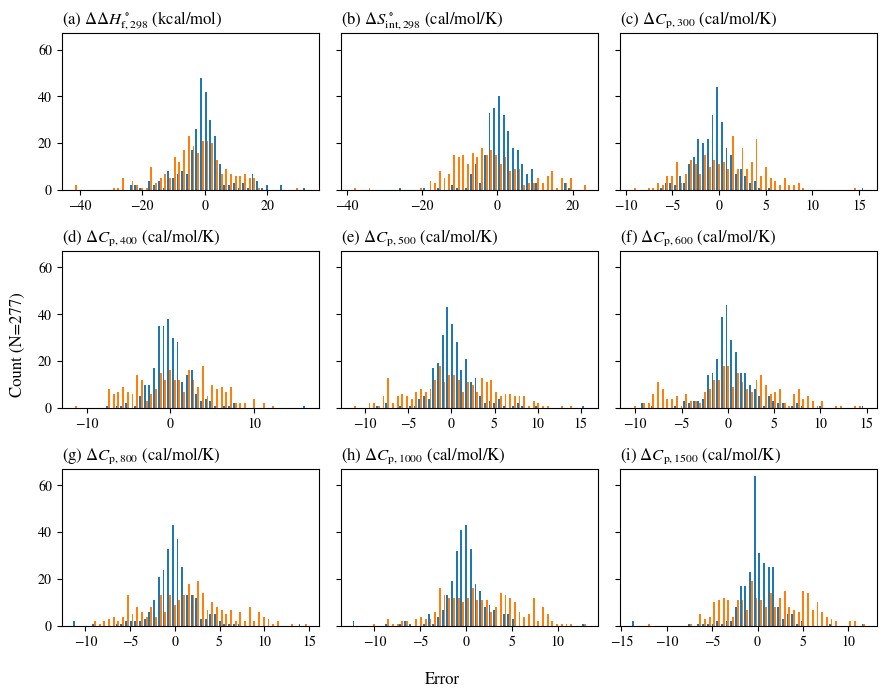

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, figsize=(9, 7))
ax = axs.flat[0]
empirical_errors = empirical_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]
sidt_errors = sidt_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]
ax.hist([empirical_errors, sidt_errors], bins=50)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
empirical_errors = empirical_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]
sidt_errors = sidt_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]
ax.hist([empirical_errors, sidt_errors], bins=50)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    empirical_errors = empirical_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]
    sidt_errors = sidt_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]
    ax.hist([empirical_errors, sidt_errors], bins=50)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Count (N={len(test_df.index)})")
fig.supxlabel(f"Error")

fig.tight_layout()
fig.savefig("../figures/test_empirical_error_hist.pdf", bbox_inches="tight")

# Plot: parity plot

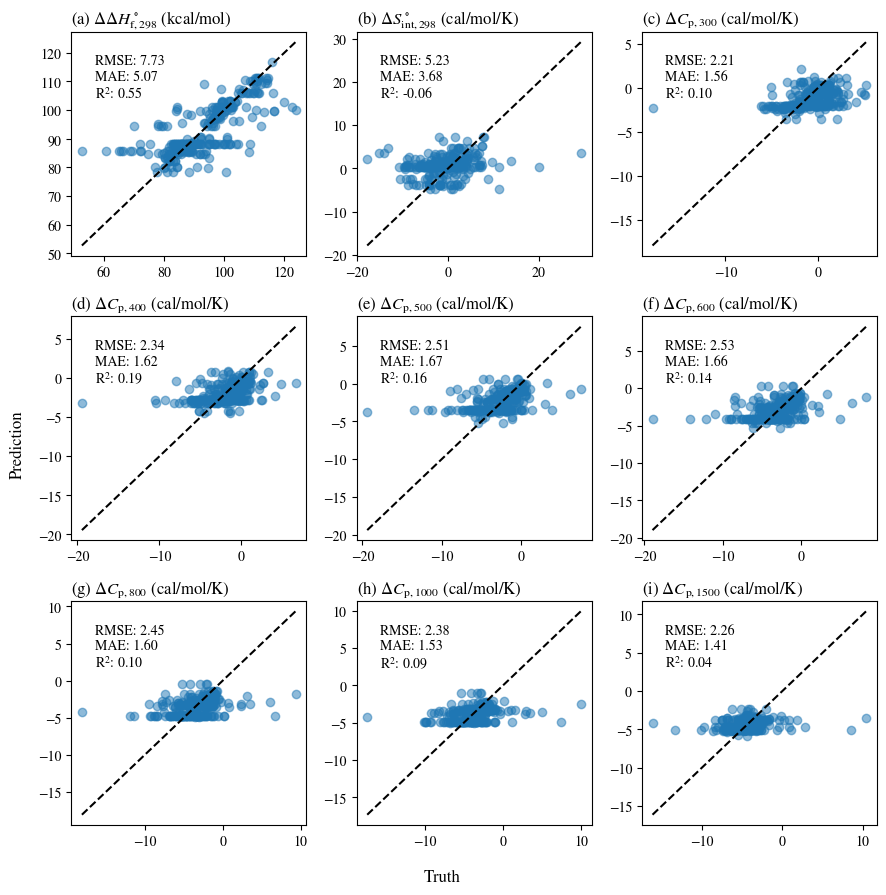

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = empirical_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = empirical_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = empirical_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/test_empirical_parity.pdf", bbox_inches="tight")

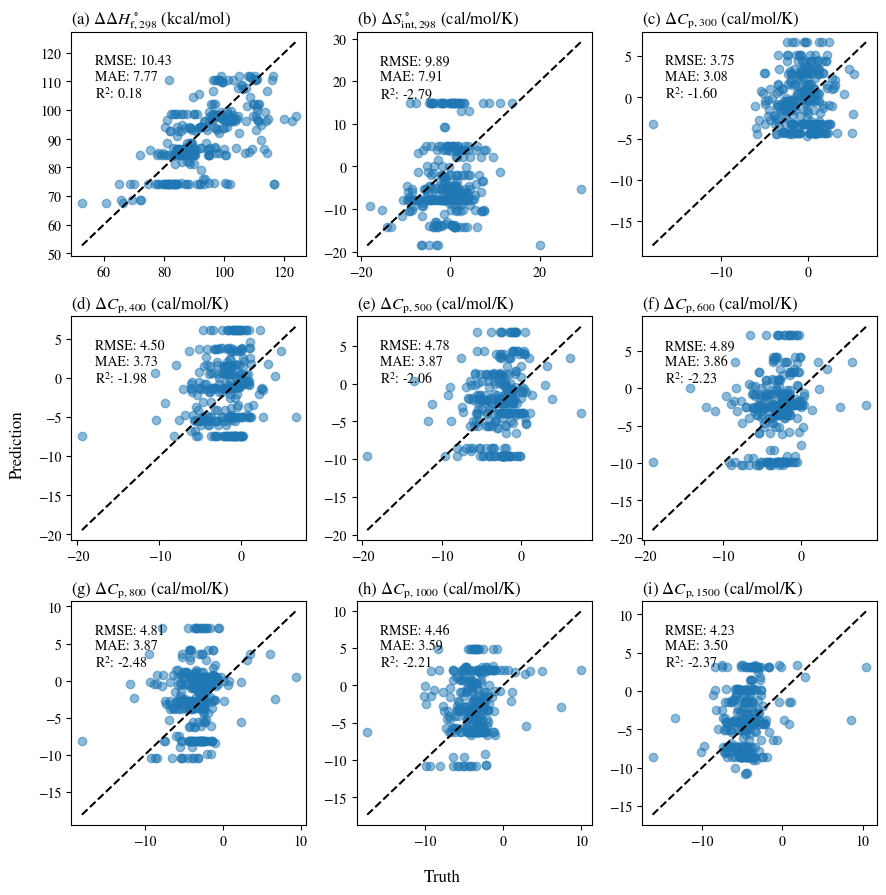

In [19]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = test_df["HBI_H298 (kcal/mol)"]
pred_ys = sidt_df["HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")

ax = axs.flat[1]
true_ys = test_df["HBI_Sint298 (cal/mol/K)"]
pred_ys = sidt_df["HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
mae = mean_absolute_error(true_ys, pred_ys)
r2 = r2_score(true_ys, pred_ys)
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = test_df[f"HBI_Cp{T} (cal/mol/K)"]
    pred_ys = sidt_df[f"HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    rmse = np.sqrt(mean_squared_error(true_ys, pred_ys))
    mae = mean_absolute_error(true_ys, pred_ys)
    r2 = r2_score(true_ys, pred_ys)
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    ax.text(0.1, 0.9, f"""RMSE: {rmse:.2f}
MAE: {mae:.2f}
R$^2$: {r2:.2f}""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")

fig.supylabel(f"Prediction")
fig.supxlabel(f"Truth")

fig.tight_layout()
fig.savefig("../figures/test_sidt_parity.pdf", bbox_inches="tight")

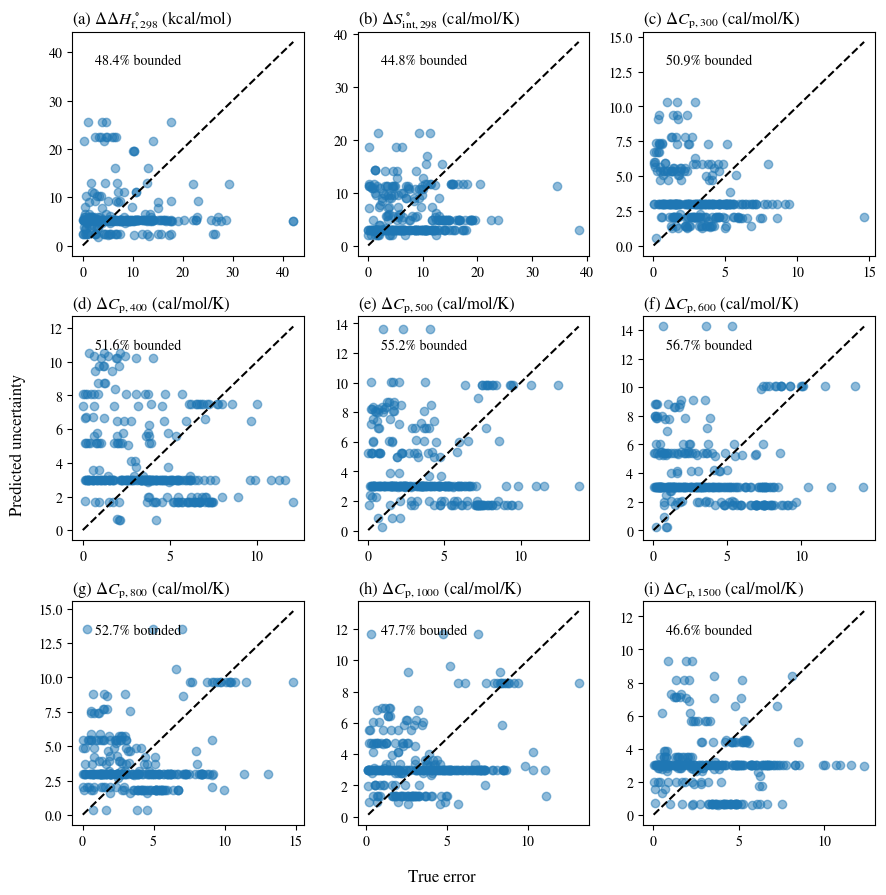

In [26]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
ax = axs.flat[0]
true_ys = (sidt_df["HBI_H298 (kcal/mol)"] - test_df["HBI_H298 (kcal/mol)"]).abs()
pred_ys = sidt_df["unc_HBI_H298 (kcal/mol)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(a) $\Delta\Delta H^\circ_\mathrm{f,298}$ (kcal/mol)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

ax = axs.flat[1]
true_ys = (sidt_df["HBI_Sint298 (cal/mol/K)"] - test_df["HBI_Sint298 (cal/mol/K)"]).abs()
pred_ys = sidt_df["unc_HBI_Sint298 (cal/mol/K)"]
min_y = min(true_ys.min(), pred_ys.min())
max_y = max(true_ys.max(), pred_ys.max())
ax.scatter(true_ys, pred_ys, alpha=0.5)
ax.plot([min_y, max_y], [min_y, max_y], "k--")
bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
ax.set_title("(b) $\Delta S^\circ_\mathrm{int,298}$ (cal/mol/K)", loc="left")
# ax.set_yscale("log")
# ax.set_xscale("log")

for i, (ax, T) in enumerate(zip(axs.flat[2:], Ts)):
    true_ys = (sidt_df[f"HBI_Cp{T} (cal/mol/K)"] - test_df[f"HBI_Cp{T} (cal/mol/K)"]).abs()
    pred_ys = sidt_df[f"unc_HBI_Cp{T} (cal/mol/K)"]
    min_y = min(true_ys.min(), pred_ys.min())
    max_y = max(true_ys.max(), pred_ys.max())
    ax.scatter(true_ys, pred_ys, alpha=0.5)
    ax.plot([min_y, max_y], [min_y, max_y], "k--")
    bounded_perc = sum(pred_ys >= true_ys) / len(true_ys) * 100
    ax.text(0.1, 0.9, f"""{bounded_perc:.1f}% bounded""", ha="left", va="top", transform=ax.transAxes)
    ax.set_title(f"({string.ascii_letters[2:][i]}) "+"$\Delta C_\mathrm{p,{" + str(T) + "}}$ (cal/mol/K)", loc="left")
    # ax.set_yscale("log")
    # ax.set_xscale("log")

fig.supylabel(f"Predicted uncertainty")
fig.supxlabel(f"True error")

fig.tight_layout()
fig.savefig("../figures/test_sidt_unc_parity.pdf", bbox_inches="tight")

# Debug

In [59]:
test_df[["radical_resonance_smiles", "HBI_H298 (kcal/mol)"]]

,radical_resonance_smiles,HBI_H298 (kcal/mol)
14,[O]C(=O)OC(=O)O,58.857481
18,[O]OC(=O)OC(=O)O,44.867361
25,C[C]1OC(=O)C(O)(C=O)O1,55.261992
36,CC1(OO)COC(O[O])C(=O)O1,56.585520
49,[O]OC1(COO)COCC(=O)O1,48.234489
...,...,...
2968,C=C=[C]C=C=C,33.569535
2969,C=[C]C=C=C=C,37.911452
2979,C=C=C1[CH]C1=C,36.202446
2980,C=[C]C1=CC1=C,30.374420


In [65]:
empirical_df[["radical_resonance_smiles", "HBI_H298 (kcal/mol)", "unc_HBI_H298 (kcal/mol)"]]

,radical_resonance_smiles,HBI_H298 (kcal/mol),unc_HBI_H298 (kcal/mol)
0,[O]C(=O)OC(=O)O,110.157744,0.0
1,[O]OC(=O)OC(=O)O,98.330000,0.0
2,C[C]1OC(=O)C(O)(C=O)O1,101.100000,0.0
3,CC1(OO)COC(O[O])C(=O)O1,88.200000,0.0
4,[O]OC1(COO)COCC(=O)O1,88.200000,0.0
...,...,...,...
273,C=C=[C]C=C=C,109.000000,0.0
274,C=[C]C=C=C=C,99.800000,0.0
275,C=C=C1[CH]C1=C,76.000000,0.0
276,C=[C]C1=CC1=C,99.800000,0.0


In [64]:
sidt_df[["radical_resonance_smiles", "HBI_H298 (kcal/mol)", "unc_HBI_H298 (kcal/mol)"]]

,radical_resonance_smiles,HBI_H298 (kcal/mol),unc_HBI_H298 (kcal/mol)
0,[O]C(=O)OC(=O)O,49.1035,5.2000
1,[O]OC(=O)OC(=O)O,48.5587,5.2000
2,C[C]1OC(=O)C(O)(C=O)O1,44.0410,5.2000
3,CC1(OO)COC(O[O])C(=O)O1,48.5587,5.2000
4,[O]OC1(COO)COCC(=O)O1,48.5587,5.2000
...,...,...,...
273,C=C=[C]C=C=C,29.4230,28.3047
274,C=[C]C=C=C=C,29.4230,28.3047
275,C=C=C1[CH]C1=C,29.4230,28.3047
276,C=[C]C1=CC1=C,29.4230,28.3047
